# Eliminating duplicates
- Thousands of training images
- Too many duplicates

## Outcome
- Used hashing to remove duplicates
- Hashing by itself didn't appear to work too well
- MSE worked much better

In [54]:
%matplotlib inline
#from pylab import rcParams
#rcParams['figure.figsize'] = 12, 8

%load_ext autoreload
%autoreload 2

%load_ext version_information
%version_information numpy, scipy, matplotlib, pandas

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
The version_information extension is already loaded. To reload it, use:
  %reload_ext version_information


Software versions
Python 2.7.13 64bit [GCC 4.2.1 Compatible Apple LLVM 8.0.0 (clang-800.0.42.1)]
IPython 5.4.1
OS Darwin 16.6.0 x86_64 i386 64bit
numpy 1.13.0
scipy 0.19.1
matplotlib 2.0.2
pandas 0.20.2
Sun Jul 09 22:30:49 2017 AEST

In [55]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import cv2
import glob
import copy

import os
import sys
import glob
import hashlib
import uuid
from sklearn.metrics import mean_squared_error

#sys.path.append("../src")
#from images_permute import processing_pipeline

np.random.seed(0)

def view(image):
    plt.figure()
    plt.axis('off')
    plt.imshow(image, cmap = cm.Greys_r)

## Test hashing on image directory

In [ ]:
hashed_images = {}
n = 0
for image_file in glob.glob('/Users/jacksimpson/Data/beeunique/output/All/queen/*.png'):
    n += 1
    image = cv2.imread(image_file, cv2.IMREAD_GRAYSCALE)
    h = hashlib.sha1(image).hexdigest()
    if h in hashed_images.keys():
        pass
        #print(h, len(hashed_images.keys()))
        #view(image)
        #view(hashed_images[h])
    else:
        hashed_images[h] = image
print(len(hashed_images.keys()), n)

## Verdict
Hashing doesn't seem to be working too well

## Comparing using mean squared error

In [56]:
def mse(imageA, imageB):
    err = np.sum((imageA.astype("float") - imageB.astype("float")) ** 2)
    err /= float(imageA.shape[0] * imageA.shape[1])
    return err

In [4]:
images = []
n = 0
for image_file in glob.glob('/Users/jacksimpson/Data/beeunique/output/All/1/*.png'):
    n += 1
    image = cv2.imread(image_file, cv2.IMREAD_GRAYSCALE)
    unseen_image = True
    for im in images:
        err = (mse(image, im))
        if err < 100:
            unseen_image = False
            break
            #view(image)
            #view(im)
        #print(err)
    if unseen_image:
        images.append(image)
    
    if n % 1000 == 0:
        print(n)
    if n % 5000 == 0:
        break
        
print(len(images), n)

(0, 0)


## Vertdict
MSE seems to work well when eliminating similar images

## Applying MSE to other image directories

False
107.570153061


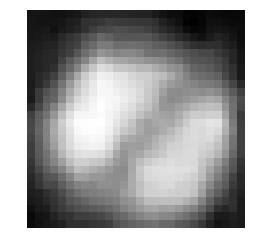

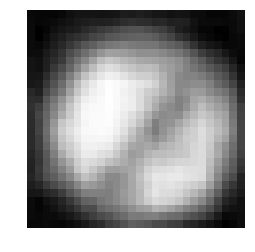

In [7]:
images = []
n = 0
for image_file in glob.glob('/Users/jacksimpson/Data/beeunique/output/All/1/1a/*.png'):
    n += 1
    if n == 100:
        break
    image = cv2.imread(image_file, cv2.IMREAD_GRAYSCALE)
    unseen_image = True
    for prev_image in images:
        err = (mse(image, prev_image))
        if err > 100 and err < 200:
            unseen_image = False
            print(unseen_image)
            view(prev_image)
            view(image)
            #print('\n')
            break
    if unseen_image:
        images.append(image)
    else:
        print(err)
        break

In [30]:
%%time
images = []
n = 0
for image_file in glob.glob('/Users/jacksimpson/Data/beeunique/output/All/1/1a/*.png'):
    n += 1
    if n == 5000:
        break
    image = cv2.imread(image_file, cv2.IMREAD_GRAYSCALE)
    unseen_image = True
    for prev_image in images:
        err = (mean_squared_error(image, prev_image))
        if err < 200:
            unseen_image = False
            break
    if unseen_image:
        images.append(image)
        
print('Done')

Done
CPU times: user 656 ms, sys: 94.4 ms, total: 750 ms
Wall time: 750 ms


In [8]:
list_image_directory_paths = glob.glob('/Users/jacksimpson/Data/beeunique/output/All/*/')
print(list_image_directory_paths[0], len(list_image_directory_paths))

('/Users/jacksimpson/Data/beeunique/output/All/0/', 65)


In [9]:
images = {}

for image_directory_path in list_image_directory_paths:
    image_class_name = os.path.basename(os.path.normpath(image_directory_path))
    print(image_class_name, image_directory_path)
    n = 0
    images[image_class_name] = []
    for image_dir in glob.glob(image_directory_path + '*/'):
        for image_file in glob.glob(image_dir + '*.png'):
            n += 1
            image = cv2.imread(image_file, cv2.IMREAD_GRAYSCALE)
            unseen_image = True
            for prev_image in images[image_class_name]:
                err = (mse(image, prev_image))
                if err < 200:
                    unseen_image = False
                    break
            
            if unseen_image:
                images[image_class_name].append(image)
            
    print(len(images[image_class_name]), n)

('0', '/Users/jacksimpson/Data/beeunique/output/All/0/')
(6219, 10591)
('1', '/Users/jacksimpson/Data/beeunique/output/All/1/')
(1466, 28267)
('2', '/Users/jacksimpson/Data/beeunique/output/All/2/')
(1723, 20616)
('3', '/Users/jacksimpson/Data/beeunique/output/All/3/')
(13538, 68218)
('4', '/Users/jacksimpson/Data/beeunique/output/All/4/')
(5833, 12798)
('5', '/Users/jacksimpson/Data/beeunique/output/All/5/')
(6337, 12011)
('6', '/Users/jacksimpson/Data/beeunique/output/All/6/')
(4345, 10445)
('7', '/Users/jacksimpson/Data/beeunique/output/All/7/')
(7226, 22481)
('8', '/Users/jacksimpson/Data/beeunique/output/All/8/')
(6289, 13130)
('a', '/Users/jacksimpson/Data/beeunique/output/All/a/')
(3454, 9015)
('AA', '/Users/jacksimpson/Data/beeunique/output/All/AA/')
(5858, 28191)
('Ampersand', '/Users/jacksimpson/Data/beeunique/output/All/Ampersand/')
(9636, 30333)
('Ankh', '/Users/jacksimpson/Data/beeunique/output/All/Ankh/')
(4639, 12257)
('ArrowLine', '/Users/jacksimpson/Data/beeunique/outp

In [10]:
print(images.keys())

['Trident', 'Leaf', 'BB', 'Note1', 'DD', 'Peace', 'EE', 'Pillars', 'HH', 'Ampersand', 'JJ', 'Notes2', 'Plant', 'Hash', 'Power', 'Ankh', 'TT', 'HollowArrow', 'Asterisk', 'UU', 'Lines3', '1', '0', '3', '2', '5', '4', '7', '6', '8', 'Omega', 'CircleCross', 'AA', 'SS', 'Circle_Line', 'queen', 'Radioactive', 'Tadpole', 'ArrowLine', 'Question', 'RR', 'PP', 'GG', 'XX', 'ZZ', 'Necklace', 'Triangle', 'Umbrella', 'Dot', 'a', 'Heart', 'b', 'e', 'Halfcircle', 'g', 'f', 'KK', 'h', 'Plane', 'n', 'MM', 'r', 'w', 'y', 'Scissors']


In [13]:
for tag in images.keys():
    tag_class_dir = '/Users/jacksimpson/Data/beeunique/training/All/{}'.format(tag)
    os.makedirs(tag_class_dir)
    for im in images[tag]:
        fname = tag_class_dir + '/' + uuid.uuid4().hex + '.png'
        cv2.imwrite(fname, im)

In [61]:
list_image_directory_paths = glob.glob('/Users/jacksimpson/Data/beeunique/output/d14-merged/*/')
print(list_image_directory_paths[0], len(list_image_directory_paths))

('/Users/jacksimpson/Data/beeunique/output/d14-merged/0/', 38)


In [62]:
images = {}
print(images)

for image_directory_path in list_image_directory_paths:
    image_class_name = os.path.basename(os.path.normpath(image_directory_path))
    print(image_class_name, image_directory_path)
    n = 0
    images[image_class_name] = []
    for image_file in glob.glob(image_directory_path + '*.png'):
        n += 1
        if n % 1000 == 0:
            print(len(images[image_class_name]), n)
        
        image = cv2.imread(image_file, cv2.IMREAD_GRAYSCALE)
        unseen_image = True
        for prev_image in images[image_class_name]:
            err = mse(image, prev_image)
            if err < 200:
                unseen_image = False
                break

        if unseen_image:
            images[image_class_name].append(image)
            
    print(len(images[image_class_name]), n)

{}
('0', '/Users/jacksimpson/Data/beeunique/output/d14-merged/0/')
(546, 1000)
(908, 2000)
(1201, 3000)
(1490, 4000)
(1750, 5000)
(1977, 6000)
(2192, 7000)
(2403, 8000)
(2600, 9000)
(2796, 10000)
(2977, 11000)
(3153, 12000)
(3311, 13000)
(3442, 14000)
(3572, 15000)
(3715, 16000)
(3857, 17000)
(3986, 18000)
(4105, 19000)
(4206, 20000)
(4325, 21000)
(4450, 22000)
(4568, 23000)
(4675, 24000)
(4785, 25000)
(4897, 26000)
(4998, 27000)
(5109, 28000)
(5217, 29000)
(5268, 29487)
('2', '/Users/jacksimpson/Data/beeunique/output/d14-merged/2/')
(559, 1000)
(909, 2000)
(1192, 3000)
(1448, 4000)
(1652, 5000)
(1838, 6000)
(2002, 7000)
(2179, 8000)
(2345, 9000)
(2501, 10000)
(2640, 11000)
(2775, 12000)
(2911, 13000)
(3053, 14000)
(3172, 15000)
(3287, 16000)
(3418, 17000)
(3532, 18000)
(3644, 19000)
(3748, 20000)
(3848, 21000)
(3960, 22000)
(4056, 23000)
(4135, 24000)
(4218, 25000)
(4306, 26000)
(4387, 27000)
(4446, 27748)
('3', '/Users/jacksimpson/Data/beeunique/output/d14-merged/3/')
(569, 1000)
(96

KeyboardInterrupt: 

In [ ]:
print(images.keys())

In [ ]:
for tag in images.keys():
    tag_class_dir = '/Users/jacksimpson/Data/beeunique/training/drive14/{}'.format(tag)
    os.makedirs(tag_class_dir)
    for im in images[tag]:
        fname = tag_class_dir + '/' + uuid.uuid4().hex + '.png'
        cv2.imwrite(fname, im)